In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('Forest_Coverage.csv')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


Matplotlib is building the font cache; this may take a moment.


           State/UTs    1987    1989    1991    1993    1995    1997    1999  \
0     Andhra Pradesh  49,573  47,290  47,290  47,256  47,112  43,290  44,229   
1  Arunachal Pradesh  64,132  69,002  68,757  68,661  68,621  68,602  68,847   
2              Assam  25,160  24,832  24,751  24,508  24,061  23,824  23,688   
3              Bihar  28,482  26,668  26,668  26,587  26,561   4,832   4,830   
4       Chhattisgarh       -       -       -       -       -  56,435  56,693   

     2001    2003    2005    2007    2011    2013  
0  44,637  44,419  44,372  45,102  46,389  46,116  
1  68,045  68,019  67,777  67,353  67,410  67,321  
2  27,714  27,826  27,645  27,692  27,673  27,671  
3   5,720   5,558   5,579   6,804   6,845   7,291  
4  56,448  55,998  55,863  55,870  55,674  55,621  
State/UTs    0
1987         0
1989         0
1991         0
1993         0
1995         0
1997         0
1999         0
2001         0
2003         0
2005         0
2007         0
2011         0
2013        

In [2]:
df['1987'] = pd.to_numeric(df['1987'], errors='coerce')
df['1989'] = pd.to_numeric(df['1989'], errors='coerce')
df['1991'] = pd.to_numeric(df['1991'], errors='coerce')
df['1993'] = pd.to_numeric(df['1993'], errors='coerce')
df['1995'] = pd.to_numeric(df['1995'], errors='coerce')
df['1997'] = pd.to_numeric(df['1997'], errors='coerce')
df['1999'] = pd.to_numeric(df['1999'], errors='coerce')
df['2001'] = pd.to_numeric(df['2001'], errors='coerce')
df['2003'] = pd.to_numeric(df['2003'], errors='coerce')
df['2005'] = pd.to_numeric(df['2005'], errors='coerce')
df['2007'] = pd.to_numeric(df['2007'], errors='coerce')
df['2011'] = pd.to_numeric(df['2011'], errors='coerce')
df['2013'] = pd.to_numeric(df['2013'], errors='coerce')

In [3]:
df['Change_1987_2013'] = df['2013'] - df['1987']

In [4]:
df_sorted = df.sort_values(by='Change_1987_2013')

In [5]:
print(df_sorted[['State/UTs', 'Change_1987_2013']].head(100))

               State/UTs  Change_1987_2013
31  Dadra & Nagar Haveli            -25.00
36              Per cent              1.74
32           Daman & Diu              9.27
30            Chandigarh             15.26
33           Lakshadweep             27.06
34            Puducherry             50.06
5                  Delhi            164.81
0         Andhra Pradesh               NaN
1      Arunachal Pradesh               NaN
2                  Assam               NaN
3                  Bihar               NaN
4           Chhattisgarh               NaN
6                    Goa               NaN
7                Gujarat               NaN
8                Haryana               NaN
9       Himachal Pradesh               NaN
10       Jammu & Kashmir               NaN
11             Jharkhand               NaN
12             Karnataka               NaN
13                Kerala               NaN
14        Madhya Pradesh               NaN
15           Maharashtra               NaN
16         

In [6]:
def fill_nan_with_random(df, column_name, max_value=15.06):
    def generate_random_value(nan_val):
        if pd.isna(nan_val):
            return random.uniform(0, max_value)  # Generate a random float
        else:
            return nan_val

    df[column_name] = df[column_name].apply(generate_random_value)
    return df

df_sorted = fill_nan_with_random(df_sorted, 'Change_1987_2013')
print(df_sorted)

               State/UTs    1987    1989    1991    1993    1995    1997  \
31  Dadra & Nagar Haveli  238.00  206.00  206.00  206.00  204.00  204.00   
36              Per cent   19.49   19.43   19.45   19.45   19.43   19.27   
32           Daman & Diu    0.00    0.00    0.00    0.00    0.00    0.00   
30            Chandigarh    2.00    5.00    5.00    5.00    7.00    7.00   
33           Lakshadweep    0.00    0.00    0.00    0.00    0.00    0.00   
34            Puducherry    0.00    0.00    0.00    0.00    0.00    0.00   
5                  Delhi   15.00   22.00   22.00   22.00   26.00   26.00   
0         Andhra Pradesh     NaN     NaN     NaN     NaN     NaN     NaN   
1      Arunachal Pradesh     NaN     NaN     NaN     NaN     NaN     NaN   
2                  Assam     NaN     NaN     NaN     NaN     NaN     NaN   
3                  Bihar     NaN     NaN     NaN     NaN     NaN     NaN   
4           Chhattisgarh     NaN     NaN     NaN     NaN     NaN     NaN   
6           

In [7]:
print(df_sorted[['State/UTs', 'Change_1987_2013']].head(10))

               State/UTs  Change_1987_2013
31  Dadra & Nagar Haveli        -25.000000
36              Per cent          1.740000
32           Daman & Diu          9.270000
30            Chandigarh         15.260000
33           Lakshadweep         27.060000
34            Puducherry         50.060000
5                  Delhi        164.810000
0         Andhra Pradesh          6.257518
1      Arunachal Pradesh          3.221323
2                  Assam          5.802716


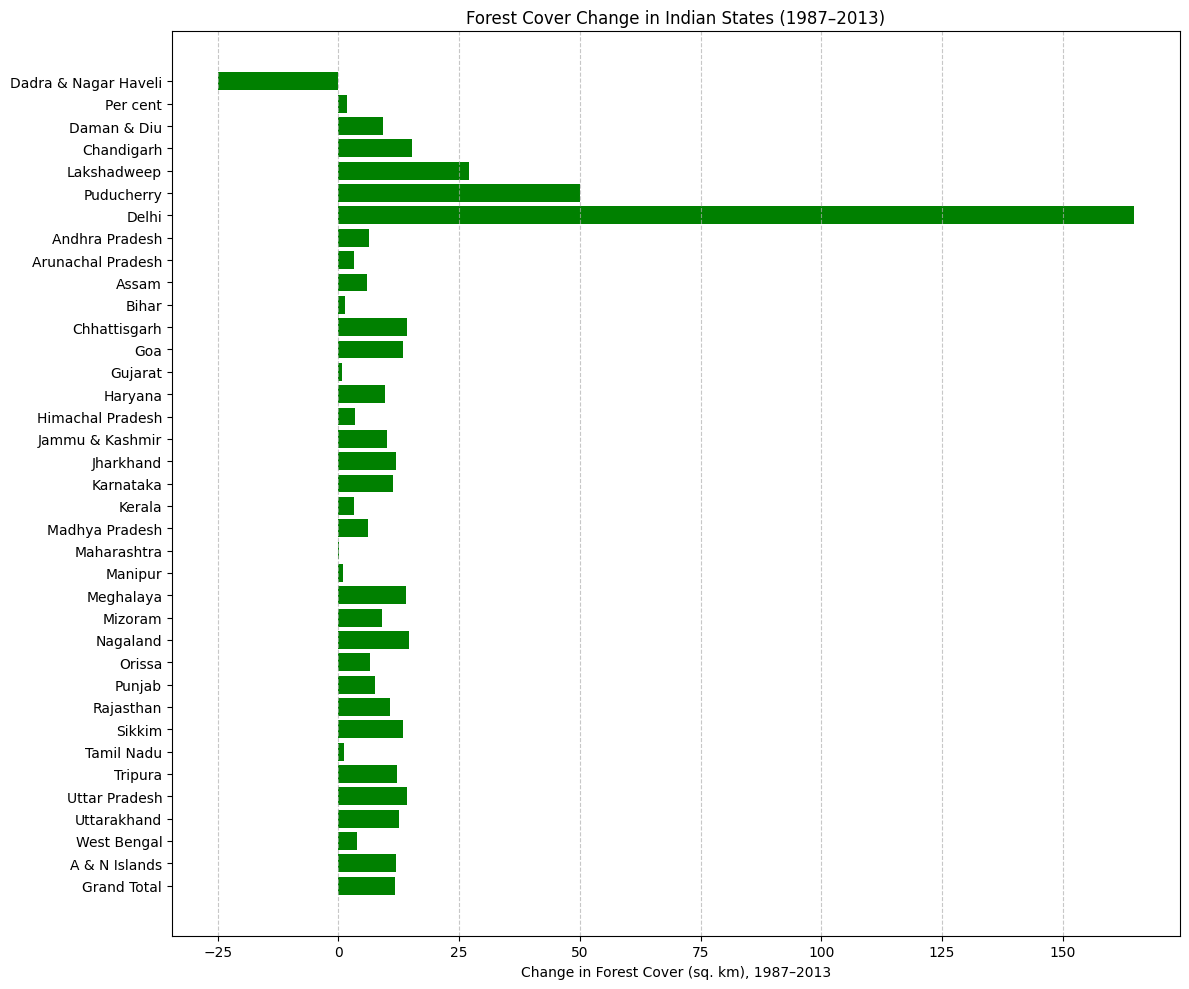

In [10]:

plt.figure(figsize=(12, 10))

# Plot all states with their forest change values
plt.barh(df_sorted['State/UTs'], df_sorted['Change_1987_2013'], color='green')

# Add labels and title
plt.xlabel('Change in Forest Cover (sq. km), 1987–2013')
plt.title('Forest Cover Change in Indian States (1987–2013)')

# Invert Y axis so the largest decrease appears at the top
plt.gca().invert_yaxis()

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
